# Aufgabe 6

## a)

Die accuracy/Genauigkeit ist eine nutzbare Metrik, solange ein ausgeglichenes Datenset zu Grunde liegt. Da die Confusion Matrix zur Validierung der Ergebnisse eingesetzt wurde und diese bestätigt, ist in diesem Fall die accuracy geeignet.

## b)

Jedes Problem braucht seinen eigenen Ansatz und die Wahl eines Algorithmusses muss immer spezifisch für das Problem erfolgen. eine allgemeine Aussage über das beste Verfahren ist nicht möglich. Kein Verfahren ist perfekt, Fehler treten immer auf, man kann nur versuchen diese zu minimieren. Zudem sollte man sich bevor man auf den Daten arbeitet sich mit diesen vertraut machen. <br />
Zum Überprüfen der Modelle sind unabhängige Daten wichtig. Es muss hierbei beachtet werden, dass beim Evaluieren von verschiedenen Ansätzen überall die gleichen Daten zum Trainieren und Testen verwendet werden, sodass diese auch direkt miteinander verglichen werden können. <br /> 

## c)

Es kann sein, dass diese Metrik bei einem Modell statistisch signifikant besser ist gegenüber eines Anderen, wenn wie in a genannt die Genauigkeit keine geeignete Metrik ist. <br />

Außerdem sollte für die Siginfikanz der Teststatistik gelten: <br />
Der berechnete Wert muss nun auf Signifikanz geprüft werden. Je nach Stichprobengrösse gilt die Teststatistik als asymptotisch Chi-Quadrat-verteilt. Sie gilt als Chi-Quadrat-verteilt, wenn:
- mehr als fünf Gruppen vorliegen
- fünf Gruppen vorliegen, von denen jede mindestens 4 Probanden umfasst
- vier Gruppen vorliegen, von denen jede mindestens 5 Probanden umfasst
- drei Gruppen vorliegen, von denen jede mindestens 9 Probanden umfasst

[Quelle](https://www.methodenberatung.uzh.ch/de/datenanalyse_spss/unterschiede/zentral/kruskal.html)

Es wird versucht aus dem Zusammenhang der vier Merkmale (sepal length, sepal width, petal length, petal width) eine Aussage über die Iris-Art zu treffen. <br />
Diese stellen die Längen dar und sind somit ordinal. Des Weiteren ist für jede Messung die Art bekannt. <br />
=> Dependenzanalyse -> Unterschiede -> Zentrale Tendenz -> Krsukal-Wallis 

Ausgeführter Code:
<br />
* Encoding: UTF-8.<br />
<br />
NPAR TESTS<br />
  /K-W=SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm BY SpeciesNumber(0 2)<br />
  /MISSING ANALYSIS<br />
  /METHOD=EXACT TIMER(5).<br />
<br />
<br />
*Nonparametric Tests: Independent Samples. <br />
NPTESTS <br />
  /INDEPENDENT TEST (SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm) GROUP (SpeciesNumber) <br />
  /MISSING SCOPE=ANALYSIS USERMISSING=EXCLUDE<br />
  /CRITERIA ALPHA=0.05  CILEVEL=95.<br />

![Effektstärke](Bilder\Effektstärke.png)

<p>
Bis auf einen Wert sind alle Korrelationskoeffizient über 0,5 und zeigen somit einem starken Effekt auf
</p>

# Code

In [1]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import os.path
from os import getcwd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
cwd = os.getcwd()
file = os.path.join(cwd, "Datasets","Iris.csv")
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset = pandas.read_csv(file, header=0, index_col=0)

In [3]:
# shape
print(dataset.shape)

(150, 5)


In [4]:
# head
print(dataset.head(20))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
6             5.4           3.9            1.7           0.4  Iris-setosa
7             4.6           3.4            1.4           0.3  Iris-setosa
8             5.0           3.4            1.5           0.2  Iris-setosa
9             4.4           2.9            1.4           0.2  Iris-setosa
10            4.9           3.1            1.5           0.1  Iris-setosa
11            5.4           3.7            1.5           0.2  Iris-setosa
12            4.8           3.4       

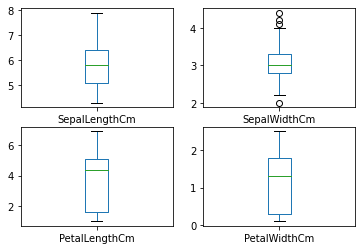

In [5]:
# box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

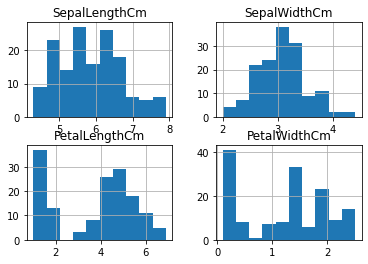

In [6]:
# histograms
dataset.hist()
plt.show()

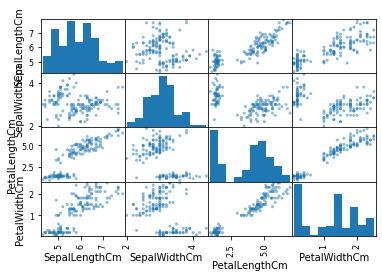

In [7]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [8]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [9]:
# Test options and evaluation metric
seed = 7
scoring = "accuracy"

In [10]:
# Spot Check Algorithms
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


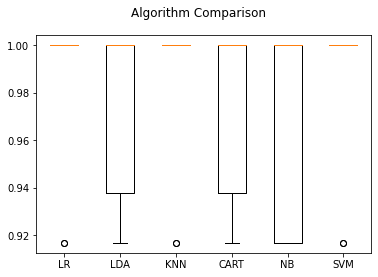

In [11]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

